In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from rdkit import Chem
import plotly.graph_objs as go

from utils import *
from plotting import *

In [3]:
df = pd.read_csv("../data/outputs/matchspectra_R/match_1%/metaboannotation_all_peaks_zeros_temp.tsv", sep="\t")
df = get_matching_rows(df, "name", "target_name")
df = append_classes(df, "name")

[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)
[17:15:33] Skipping unrecognized collection type at line 48576: MDLV30/STERAC1 BONDS=(1 7)

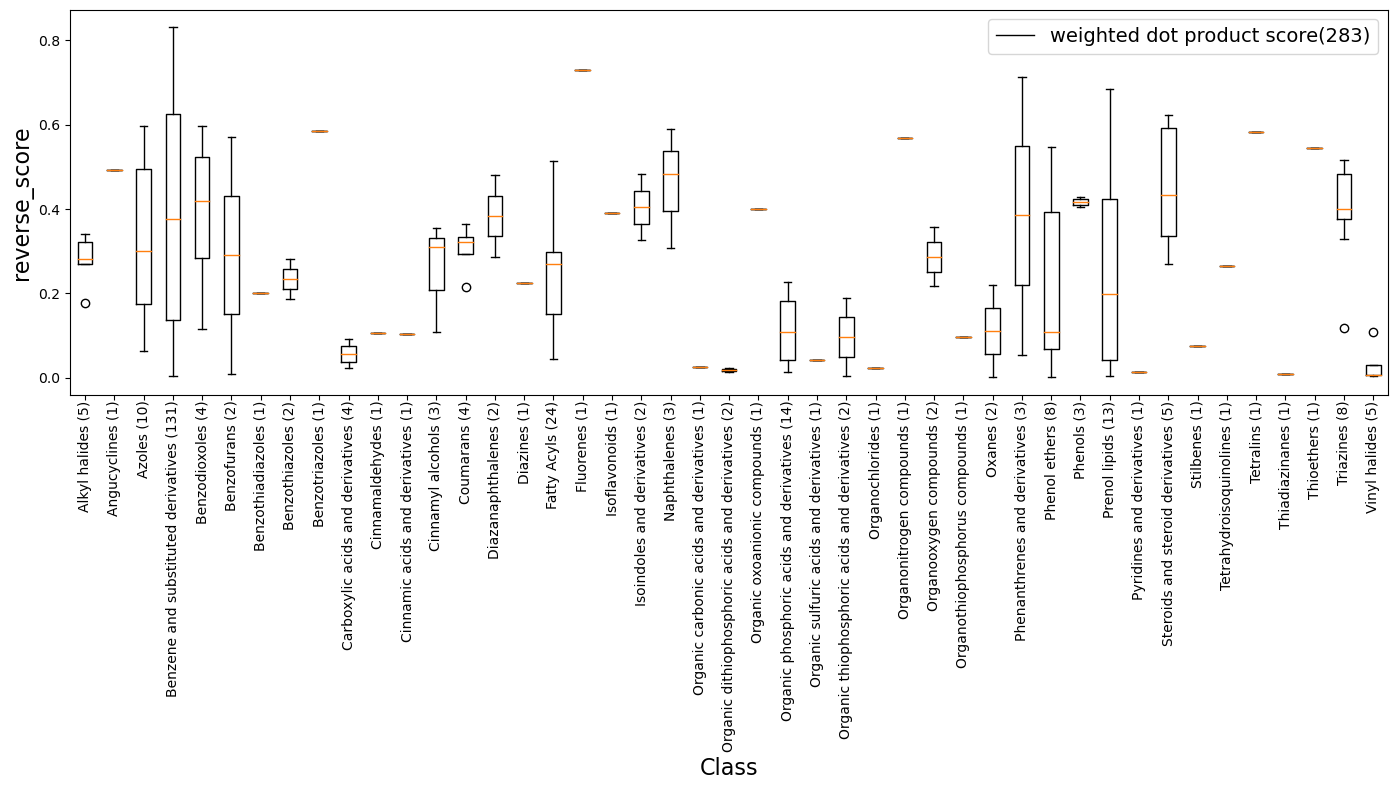

In [7]:
make_boxplot(df.groupby("class"), "reverse_score", f"weighted dot product score({len(df)})")